In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

user_data = pd.read_csv("csv/all_user_data_c_50_90_s.csv")

In [13]:
user_data.drop(user_data.columns[[0]], axis=1, inplace=True)
user_data.head()

,id,name,editcount,status
0,228,!dea4u,1,1
1,1350,$uperFan32,1,1
2,2346,***Ria777,1,1
3,2460,*AirportUpdater*,1,1
4,2555,*Kat*,1,1


In [14]:
user_data = user_data[user_data['status']>0]
user_data = user_data[:30]  # same as df.head(10)

In [15]:
user_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,id,editcount,status
count,30,30,30
mean,10352.9,1,1
std,9063.9,0,0
min,228,1,1
25%,3200.25,1,1
50%,5364,1,1
75%,18211.5,1,1
max,27229,1,1


User ID:  228


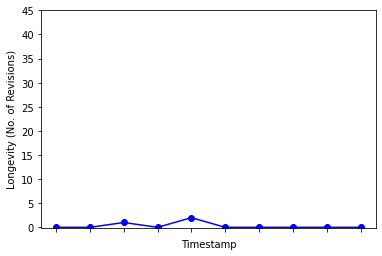

User ID:  2346


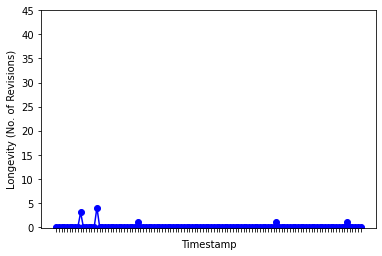

User ID:  2460


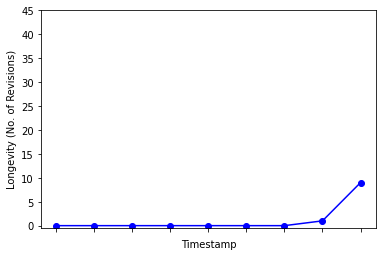

User ID:  3200


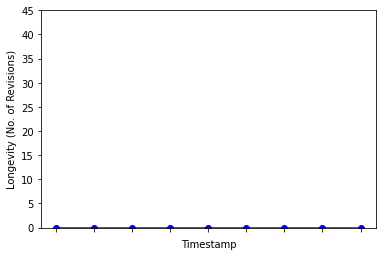

User ID:  3201


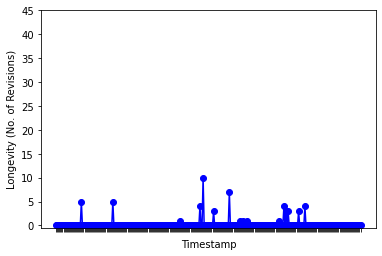

User ID:  3437


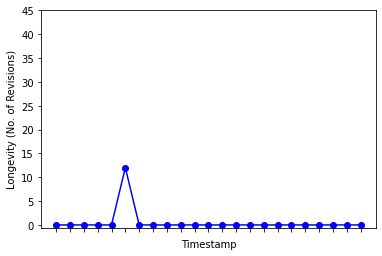

User ID:  3469


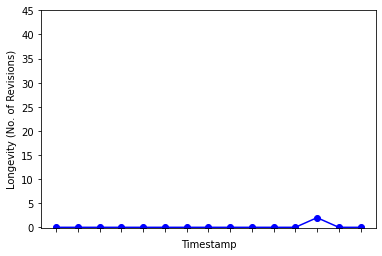

User ID:  4191


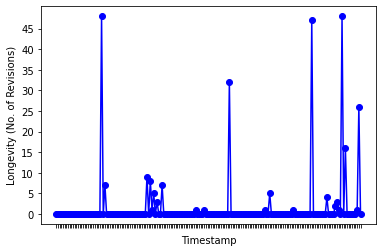

User ID:  6537


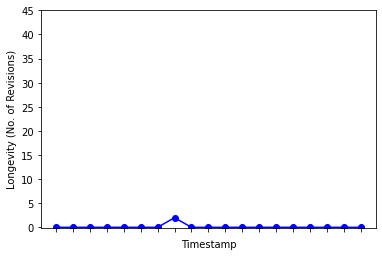

User ID:  7177


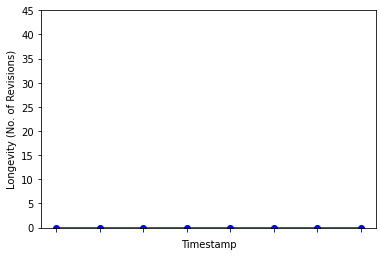

User ID:  9763


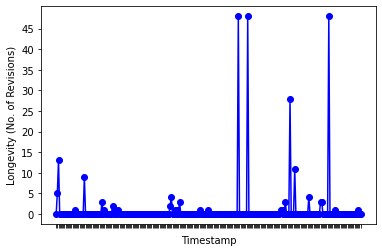

User ID:  11266


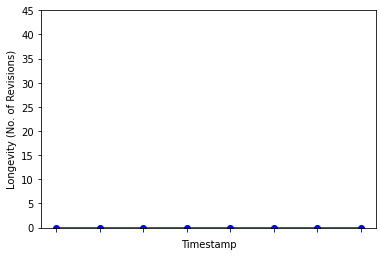

User ID:  19218


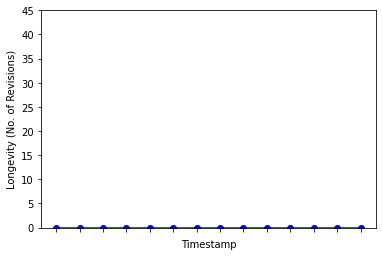

In [17]:

import os.path
import numpy as np
from trust_score import TrustScore
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import json

y_pred = []
y_test=[]
cou = 0

for row in user_data.iterrows():
    path = 'user_data_50_90_c_1/rev_list_' + str(row[1]['id']) + '-dp.json'
    #print(path)
    try:
        with open(path, 'r') as infile:
            data = json.loads(infile.read())

            if len(data) > 0:
                for d in data:
                    del d['next_rev']

                graph_for = "longevityRev"

                series = pd.DataFrame(data=data)
                series = series[['pageid', 'timestamp', graph_for]]
                series = series[series.longevityRev >= 0]
                if len(series) > 5:
                    print('User ID: ', str(row[1]['id']))
                    plot = plt.plot(series['timestamp'], series[graph_for], 'b-o')

                    plt.xticks(rotation=45, ha='right')
                    plt.xlabel("Timestamp")
                    plt.ylabel("Longevity (No. of Revisions)")
                    ax = plt.gca()

                    plt.yticks(np.arange(0, 50, 5.0))

                    ax.set_xticklabels([])
                    plt.show()

                    
    except Exception as e:
        #print('error :',e.message)
        cou= cou+1